<br><br>
El presente notebook tiene por finalidad aprender a extraer datos de una pagina web, en este caso y a modo de ejemplo, de la loteria "La Tinka". Con la realización de un pequeño analisis descriptivo para entender la ocurrencia de cada valor.
<br><br>

In [1]:
# librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly


In [2]:
# Leer datos desde internet de la tinka

######################################################################
# Truco para leer datos sin SSL - sin verificacion
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
######################################################################

# Leer datos de tabla segun pagina web de la Tinka
tabla = pd.read_html('https://resultados.intralot.com.pe/i.do?m=historico')

# Adaptar nombres y elementos de tabla
nombres = tabla[0].copy()
tabla = tabla[1]
tabla.columns = nombres.columns
tabla =  tabla.rename(columns={"Unnamed: 3":"Yapa"})
del nombres

# crear nuevas columnas "b_i" y "o_i"
columnas_nuevas = ["b" + str(ii) for ii in range(1,6+1)]
columnas_nuevas.extend(["o" + str(ii) for ii in range(1,6+1)])
tabla.loc[:,columnas_nuevas] = [0]*12
tabla.loc[:,columnas_nuevas] = tabla.loc[:,columnas_nuevas].astype('int8',copy=False)

######################

# Crear columnas "b1" a "b6"
tabla.loc[:,"b1":"b6"] = tabla['Bolillas'].str.split(" ").tolist()
tabla.loc[:,columnas_nuevas] = tabla.loc[:,columnas_nuevas].astype('int8',copy=False)
tabla.loc[:,"Fecha"] = pd.to_datetime(tabla.loc[:,"Fecha"],infer_datetime_format=True) 
######################

## generar las columnas o1,o2...o6
#### NOTA: por ejemplo si el resultado fue b1 ... b6 = 20,13,40,4,18,33
#### entonces sus valores ordenaos serian  o1 ... o6 = 4,13,18,20,33,40
for ii in range(tabla.shape[0]):
    datitos = tabla.loc[ii,"b1":"b6"].copy().tolist()
    datitos = np.sort(datitos).tolist()
    tabla.loc[ii,"o1":"o6"] = datitos
    del datitos

# tabla auxiliar
tabla_aux = tabla.copy()
######################
tabla # ver 

Fecha  Sorteo           Bolillas  Yapa  Adicionales  \
0    2022-06-03     861  12 44 03 41 14 22  21.0        05 28   
1    2022-02-03     860  19 20 13 37 08 02  36.0        33 43   
2    2022-02-27     859  23 45 11 30 21 10   4.0     36 20 38   
3    2022-02-23     858  13 35 19 01 21 08  10.0     45 44 16   
4    2022-02-20     857  28 24 46 05 11 38   2.0  17 19 21 44   
...         ...     ...                ...   ...          ...   
2138 1994-11-13       5  04 10 13 14 18 24   NaN          NaN   
2139 1994-06-11       4  07 11 12 19 29 31   NaN          NaN   
2140 1994-10-30       3  12 13 16 18 31 32   NaN          NaN   
2141 1994-10-23       2  10 14 18 20 24 34   NaN          NaN   
2142 1994-10-16       1  32 17 36 30 13 10   NaN          NaN   

           Sorteo Extra  b1  b2  b3  b4  b5  b6  o1  o2  o3  o4  o5  o6  
0     Promoción Sí o Sí  12  44   3  41  14  22   3  12  14  22  41  44  
1     Promoción Sí o Sí  19  20  13  37   8   2   2   8  13  19  20  37  
2     Promoción Sí o Sí  23  45  11  30  21  10  10  11  21  23  30  45  
3     Promoción Sí o Sí  13  35  19   1  21   8   1   8  13  19  21  35  
4     Promoción Sí o Sí  28  24  46   5  11  38   5  11  24  28  38  46  
...                 ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  
2138                NaN   4  10  13  14  18  24   4  10  13  14  18  24  
2139                NaN   7  11  12  19  29  31   7  11  12  19  29  31  
2140                NaN  12  13  16  18  31  32  12  13  16  18  31  32  
2141                NaN  10  14  18  20  24  34  10  14  18  20  24  34  
2142                NaN  32  17  36  30  13  10  10  13  17  30  32  36  

[2143 rows x 18 columns]

------

Seleccion de datos en rango de fechas

In [3]:
# Aplicar algun filtrado segun fecha o rango en especifico --- Tomamos unos años de rango

# fecha inicio y fin ... formato: "año-mes-dia"
fecha_inicio = "2017-01-01"
fecha_fin    = "2023-01-01"
print('\nFecha inicio: ',fecha_inicio," ; Fecha fin: ",fecha_fin,'\n')

# restaurar valores originales
tabla = tabla_aux.copy()

# aplicar filtrado de fechas
tabla = tabla[(tabla["Fecha"] >= fecha_inicio) & (tabla["Fecha"] <= fecha_fin)].copy()
print('\nCantidad de Tinkas jugadas: ',tabla.shape[0],'\n')
tabla # ver df


Fecha inicio:  2017-01-01  ; Fecha fin:  2023-01-01 


Cantidad de Tinkas jugadas:  508 



Fecha  Sorteo           Bolillas  Yapa  Adicionales  \
0   2022-06-03     861  12 44 03 41 14 22  21.0        05 28   
1   2022-02-03     860  19 20 13 37 08 02  36.0        33 43   
2   2022-02-27     859  23 45 11 30 21 10   4.0     36 20 38   
3   2022-02-23     858  13 35 19 01 21 08  10.0     45 44 16   
4   2022-02-20     857  28 24 46 05 11 38   2.0  17 19 21 44   
..         ...     ...                ...   ...          ...   
503 2017-01-15     358  01 05 10 23 27 36  44.0          NaN   
504 2017-11-01     357  08 09 20 24 40 41  11.0          NaN   
505 2017-08-01     356  03 19 35 39 43 44   7.0          NaN   
506 2017-04-01     355  11 13 22 26 42 45   8.0          NaN   
507 2017-01-01     354  04 07 12 20 35 38  11.0          NaN   

          Sorteo Extra  b1  b2  b3  b4  b5  b6  o1  o2  o3  o4  o5  o6  
0    Promoción Sí o Sí  12  44   3  41  14  22   3  12  14  22  41  44  
1    Promoción Sí o Sí  19  20  13  37   8   2   2   8  13  19  20  37  
2    Promoción Sí o Sí  23  45  11  30  21  10  10  11  21  23  30  45  
3    Promoción Sí o Sí  13  35  19   1  21   8   1   8  13  19  21  35  
4    Promoción Sí o Sí  28  24  46   5  11  38   5  11  24  28  38  46  
..                 ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  
503                NaN   1   5  10  23  27  36   1   5  10  23  27  36  
504                NaN   8   9  20  24  40  41   8   9  20  24  40  41  
505                NaN   3  19  35  39  43  44   3  19  35  39  43  44  
506                NaN  11  13  22  26  42  45  11  13  22  26  42  45  
507                NaN   4   7  12  20  35  38   4   7  12  20  35  38  

[508 rows x 18 columns]

Ver curvas con los resultados obtenidos

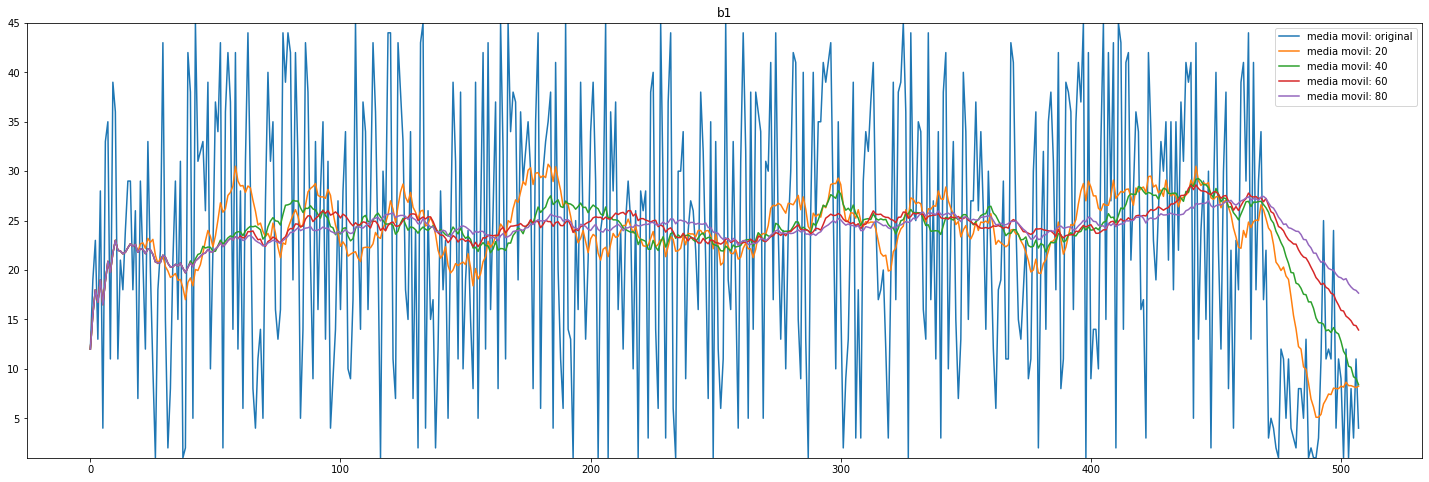

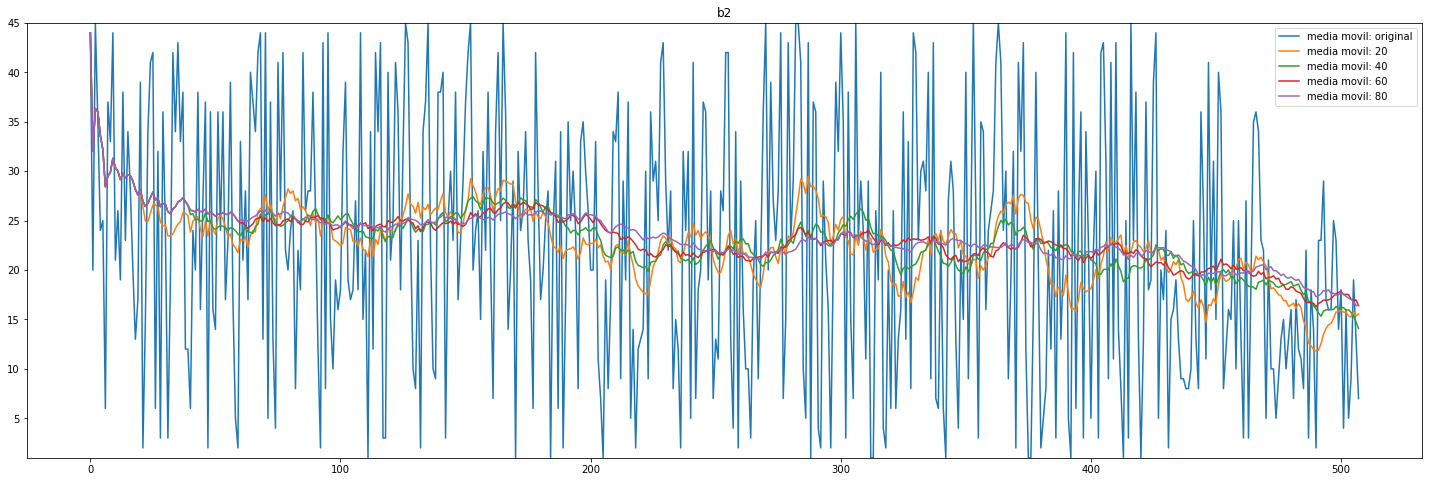

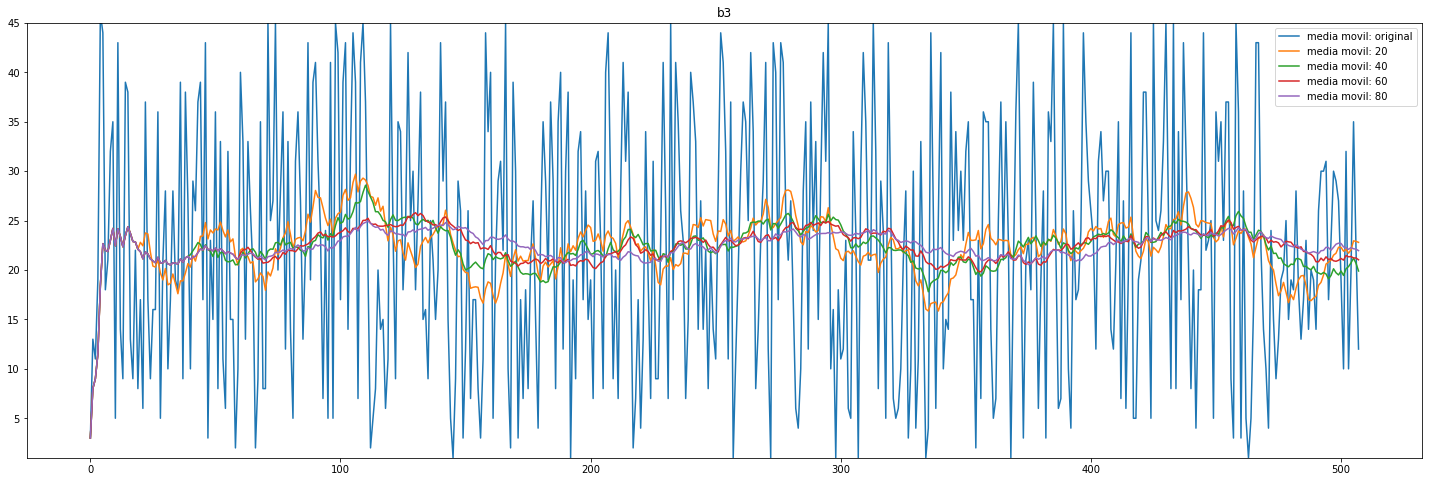

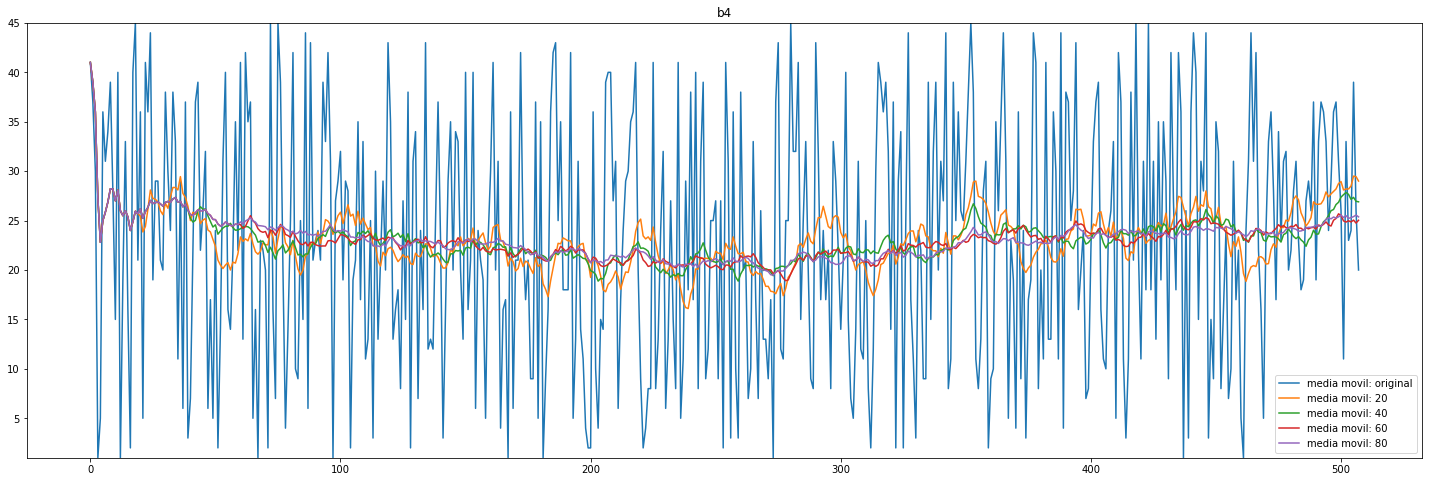

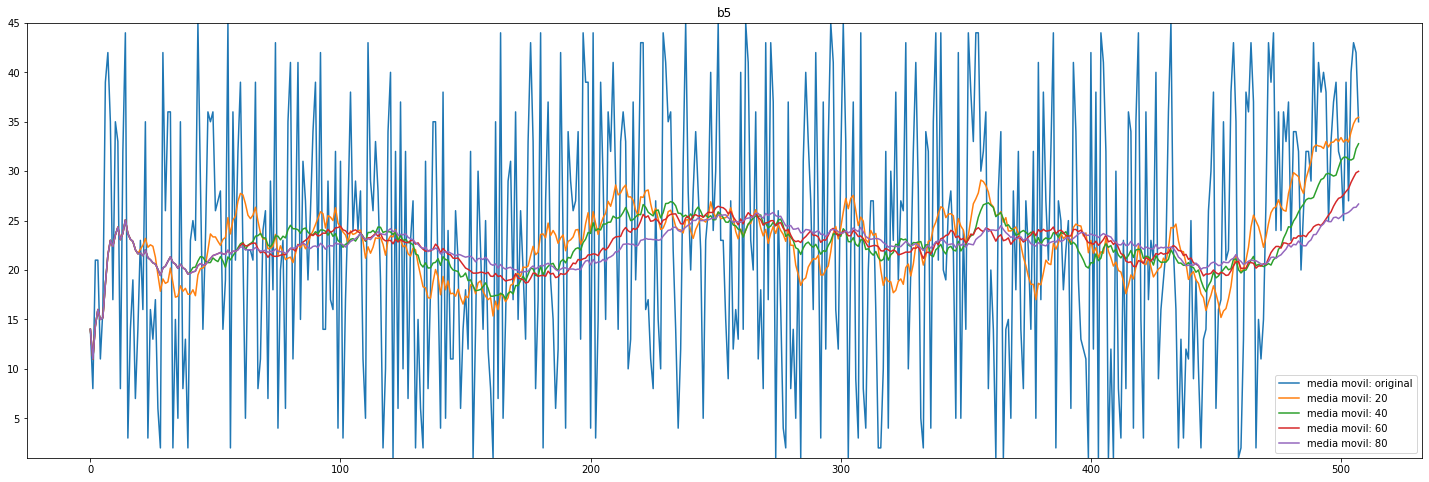

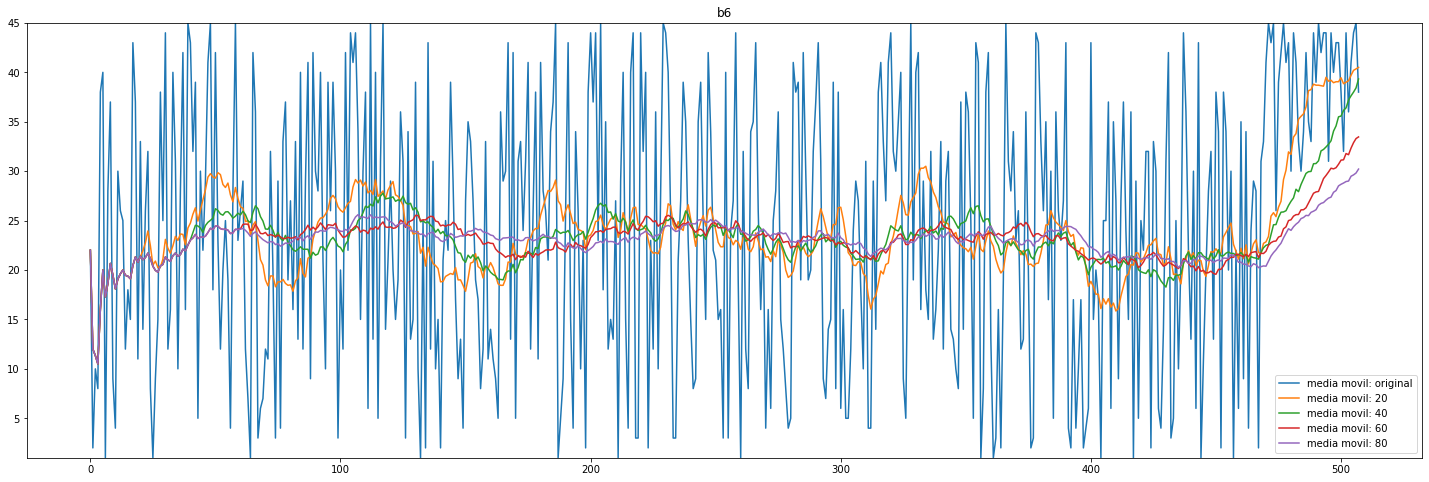

In [4]:
# ver los valores valores originales b1,b2,...,b6

columnas = ["b" + str(ii) for ii in range(1,6+1)]
for col in columnas:
    plt.figure(figsize=(25,8))
    plt.plot(tabla[col][::-1],label='media movil: original') # invertir order de resultados
    plt.title(col)
    plt.ylim([1,45])
    
    # graficar medias moviles (suavizador de la curva para buscar la tendencia de la señal)
    for ventana in range(20,100,20):
        paux = tabla[col].rolling(ventana,min_periods=1,center=False).mean()
        plt.plot(paux[::-1],label='media movil: '+str(ventana))
    plt.legend()
    plt.show()

# fin

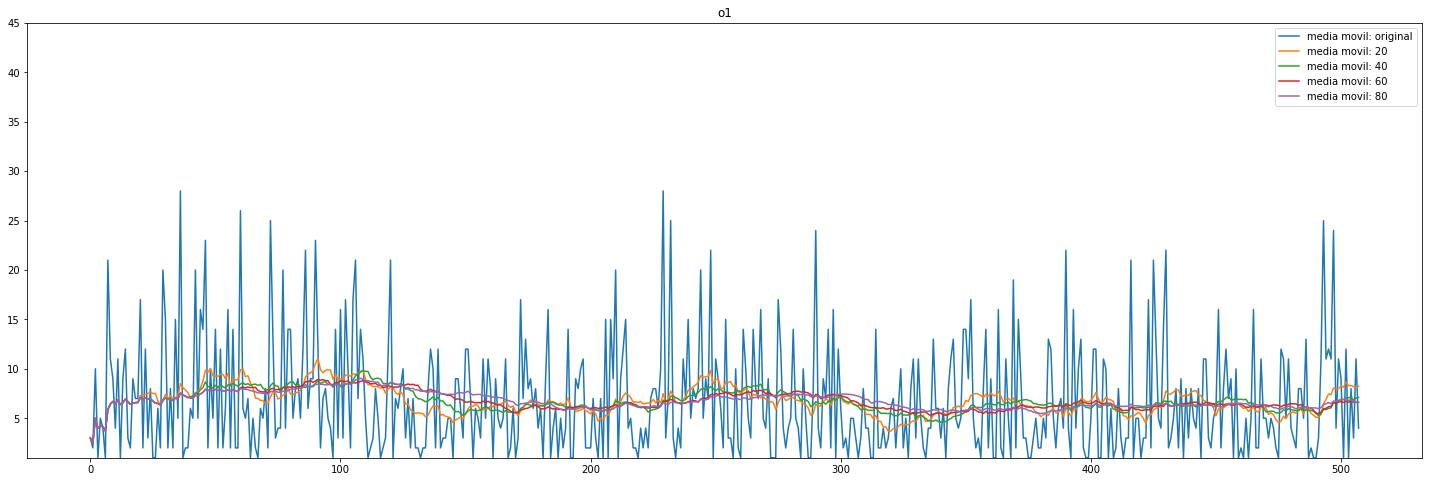

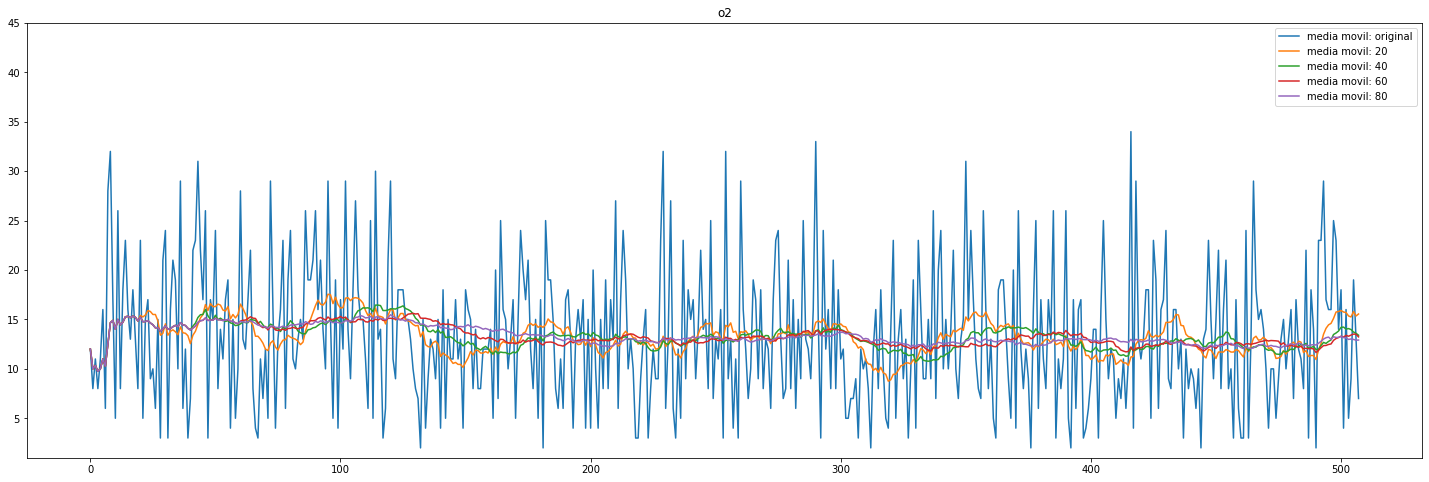

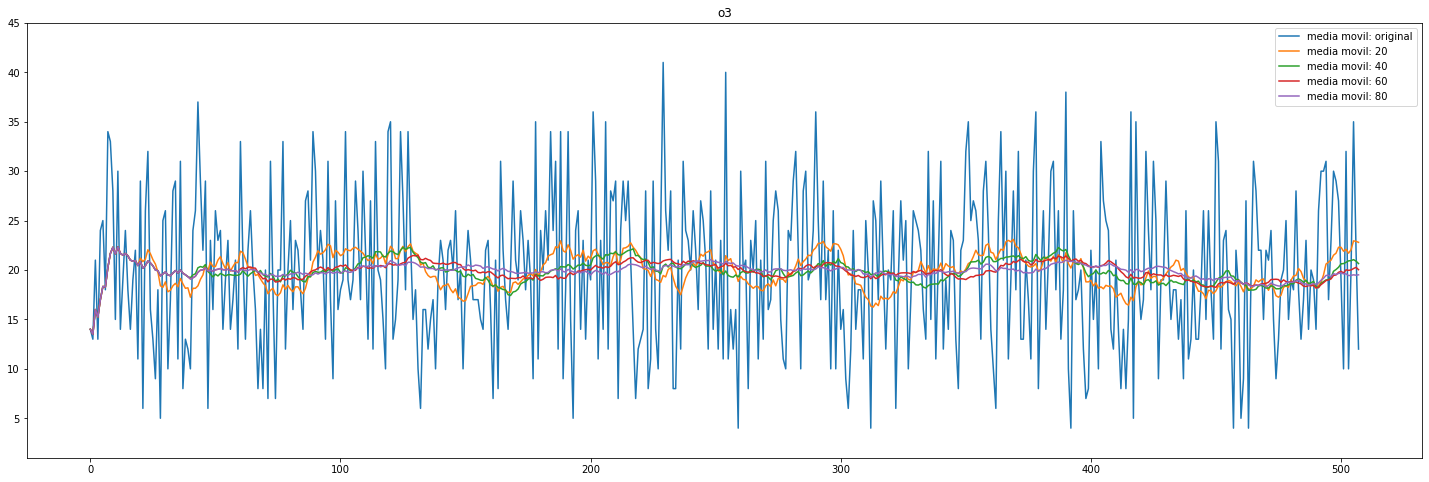

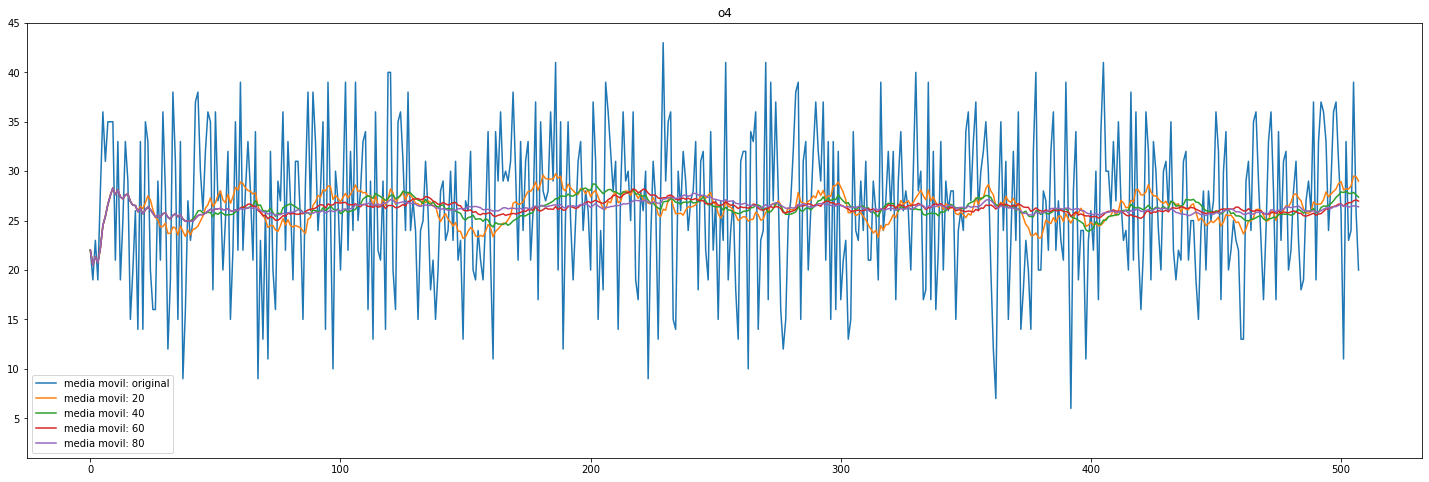

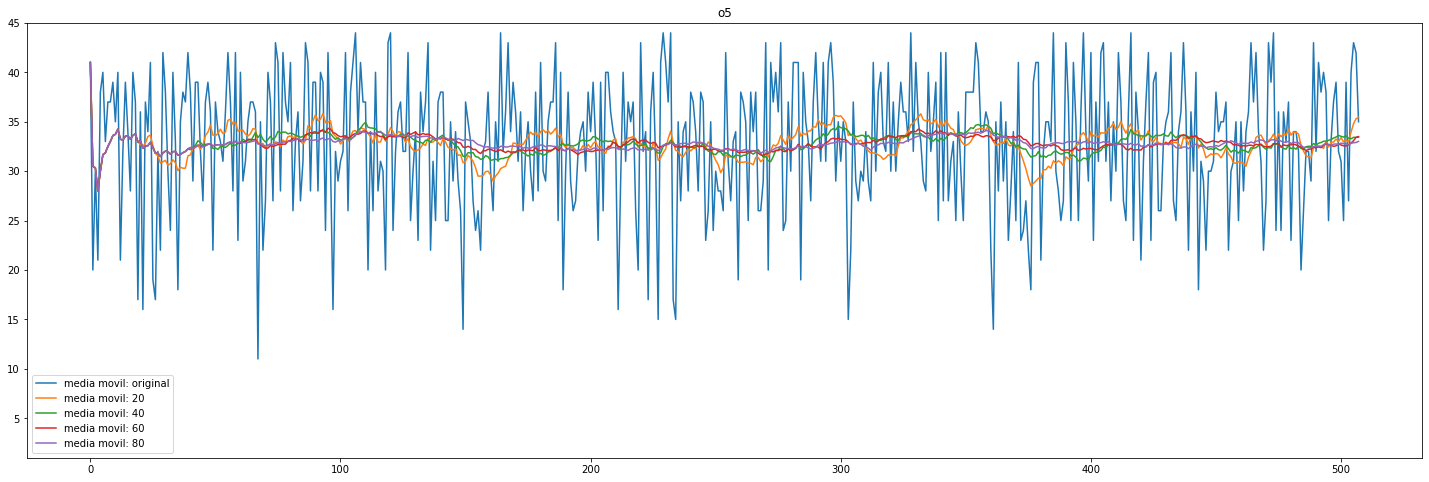

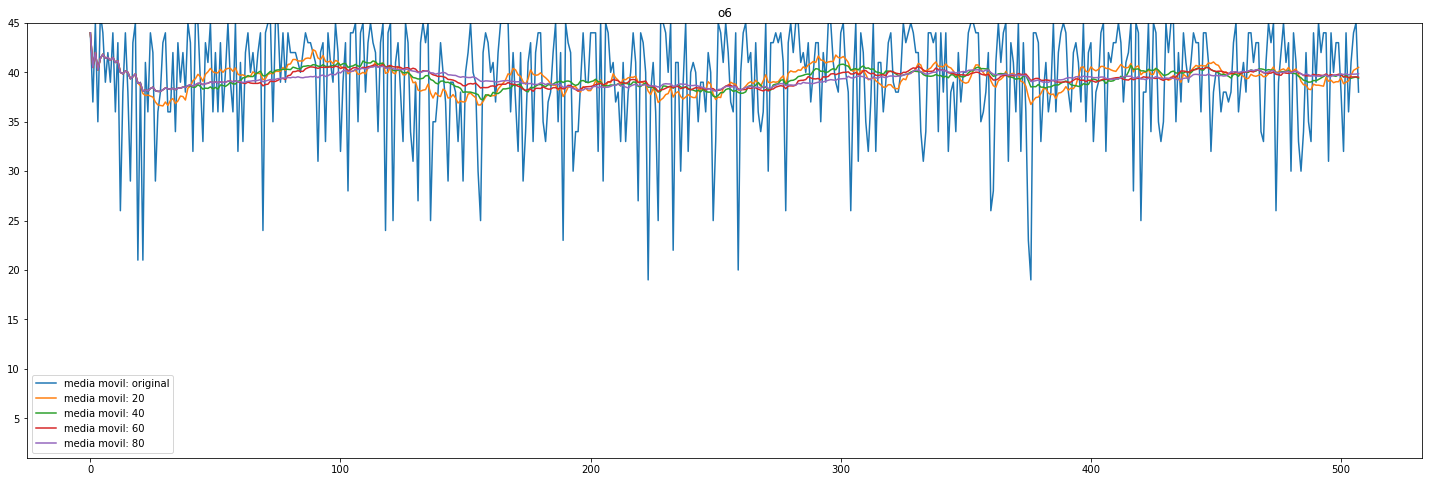

In [6]:
# ver los valores valores ordenados o1,o2,...,o6

columnas = ["o" + str(ii) for ii in range(1,6+1)]
for col in columnas:
    plt.figure(figsize=(25,8))
    plt.plot(tabla[col][::-1],label='media movil: original') # invertir order de resultados
    plt.title(col)
    plt.ylim([1,45])
    
    # graficar medias moviles (suavizador de la curva para buscar la tendencia de la señal)
    for ventana in range(20,100,20):
        paux = tabla[col].rolling(ventana,min_periods=1,center=False).mean()
        plt.plot(paux[::-1],label='media movil: '+str(ventana))
    plt.legend()
    plt.show()

# fin

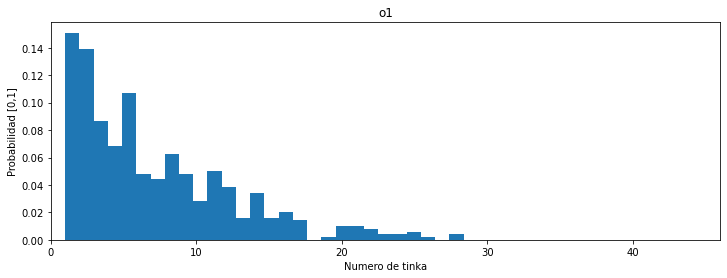

         prob  numero_bola  prob_total
0   15.099320            1       15.10
1   13.891374            2       28.99
4   10.670186            5       39.66
2    8.656943            3       48.32
3    6.845025            4       55.16
7    6.241052            8       61.40
10   5.033107           11       66.44
8    4.831782            9       71.27
5    4.831782            6       76.10
6    4.429134            7       80.53
11   3.825161           12       84.35
13   3.422513           14       87.78
9    2.818540           10       90.60
15   2.013243           16       92.61
14   1.610594           15       94.22
------------------------------------------------




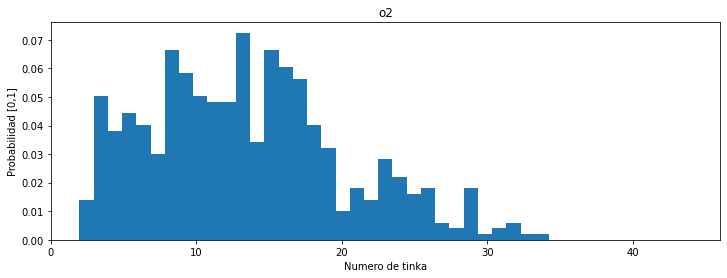

        prob  numero_bola  prob_total
12  7.247674           13        7.25
14  6.643701           15       13.89
7   6.643701            8       20.54
15  6.039728           16       26.57
8   5.838404            9       32.41
16  5.637079           17       38.05
2   5.033107            3       43.08
9   5.033107           10       48.12
10  4.831782           11       52.95
11  4.831782           12       57.78
4   4.429134            5       62.21
5   4.026485            6       66.24
17  4.026485           18       70.26
3   3.825161            4       74.09
13  3.422513           14       77.51
18  3.221188           19       80.73
6   3.019864            7       83.75
22  2.818540           23       86.57
23  2.214567           23       88.78
25  1.811918           25       90.60
28  1.811918           28       92.41
20  1.811918           21       94.22
------------------------------------------------




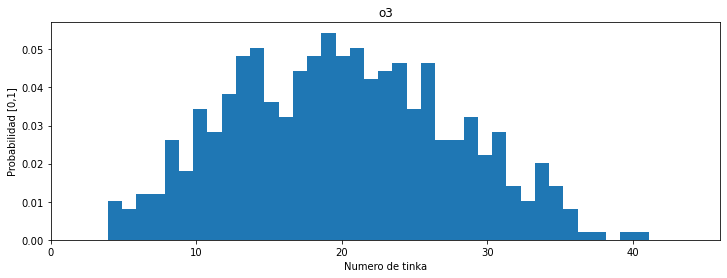

        prob  numero_bola  prob_total
18  5.435755           19        5.44
20  5.033107           21       10.47
13  5.033107           14       15.50
12  4.831782           13       20.33
19  4.831782           20       25.17
17  4.831782           18       30.00
25  4.630458           25       34.63
23  4.630458           23       39.26
16  4.429134           17       43.69
22  4.429134           23       48.12
21  4.227810           22       52.34
11  3.825161           12       56.17
14  3.623837           15       59.79
24  3.422513           24       63.22
9   3.422513           10       66.64
28  3.221188           28       69.86
15  3.221188           16       73.08
10  2.818540           11       75.90
30  2.818540           30       78.72
27  2.617215           27       81.34
26  2.617215           26       83.95
7   2.617215            8       86.57
29  2.214567           29       88.78
33  2.013243           33       90.80
8   1.811918            9       92.61
34  1.409270

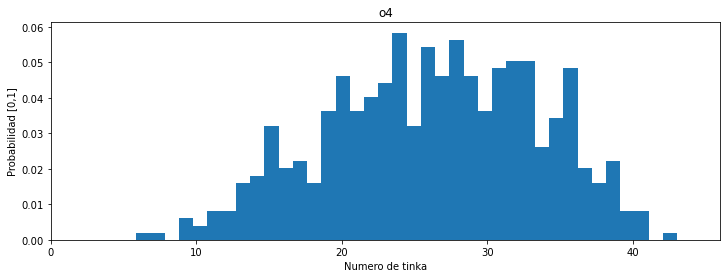

        prob  numero_bola  prob_total
23  5.838404           23        5.84
27  5.637079           27       11.48
25  5.435755           25       16.91
32  5.033107           32       21.94
31  5.033107           31       26.98
35  4.831782           35       31.81
30  4.831782           30       36.64
19  4.630458           20       41.27
28  4.630458           28       45.90
26  4.630458           26       50.53
22  4.429134           23       54.96
21  4.026485           22       58.99
29  3.623837           29       62.61
18  3.623837           19       66.24
20  3.623837           21       69.86
34  3.422513           34       73.28
24  3.221188           24       76.50
14  3.221188           15       79.72
33  2.617215           33       82.34
16  2.214567           17       84.56
38  2.214567           38       86.77
15  2.013243           16       88.78
36  2.013243           36       90.80
13  1.811918           14       92.61
37  1.610594           37       94.22
------------

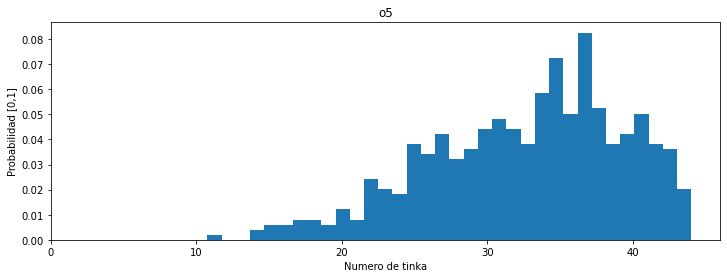

        prob  numero_bola  prob_total
36  8.254295           36        8.25
34  7.247674           34       15.50
33  5.838404           33       21.34
37  5.234431           37       26.57
35  5.033107           35       31.61
40  5.033107           40       36.64
30  4.831782           30       41.47
29  4.429134           29       45.90
31  4.429134           31       50.33
39  4.227810           39       54.56
26  4.227810           26       58.79
41  3.825161           41       62.61
32  3.825161           32       66.44
24  3.825161           24       70.26
38  3.825161           38       74.09
28  3.623837           28       77.71
42  3.623837           42       81.34
25  3.422513           25       84.76
27  3.221188           27       87.98
21  2.415891           22       90.39
43  2.013243           43       92.41
22  2.013243           23       94.42
------------------------------------------------




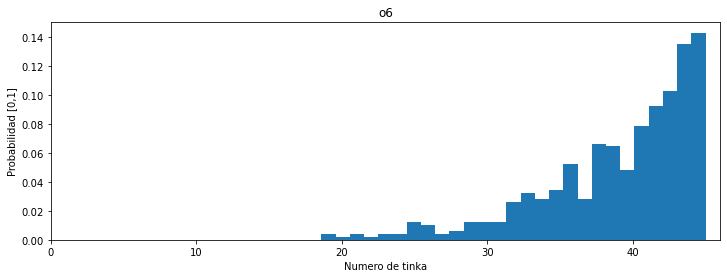

         prob  numero_bola  prob_total
44  14.322216           44       14.32
43  13.515331           43       27.84
42  10.287789           42       38.13
41   9.279182           41       47.40
40   7.867133           40       55.27
37   6.656805           37       61.93
38   6.455083           38       68.38
35   5.244755           35       73.63
39   4.841313           39       78.47
34   3.429263           34       81.90
32   3.227542           32       85.13
33   2.824099           33       87.95
36   2.824099           36       90.77
31   2.622378           31       93.40
30   1.210328           30       94.61
------------------------------------------------




In [7]:
# ver distribucion de valores segun bolita ... analizar las probabilidades de aparecer de cada valor

columnas = ["o" + str(ii) for ii in range(1,6+1)]
for col in columnas:
    plt.figure(figsize=(12,4))
    datosx = plt.hist(tabla[col],range=(1,45),bins=45,density=True)
    plt.title(col)
    plt.xlim([0,46])
    plt.xlabel('Numero de tinka')
    plt.ylabel('Probabilidad [0,1]')
    plt.show()
    
    # Calculo de valores acumulados de probabilidad
    dax = pd.DataFrame({'prob':datosx[0],'numero_bola':datosx[1][:-1]})
    dax["prob"] = dax["prob"]*100.0
    dax['numero_bola'] = np.round(dax['numero_bola'],0)
    dax["numero_bola"] = dax["numero_bola"].astype('int8') 
    dax = dax.sort_values('prob',ascending=False)
    dax['prob_total'] = dax['prob'].cumsum()
    dax['prob_total'] = np.round(dax['prob_total'],2)
    
    ## Mostrar tabla #####
    # solo imprimir las primeras filas, tal que la probabilidad acumulada no supere "cum_max"
    cum_max = 95.0  # probabilidad acumulada
    print(dax[dax['prob_total'] < cum_max])
    print('------------------------------------------------\n\n')

# fin

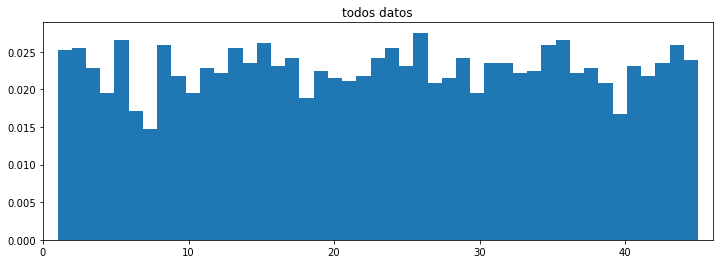

        prob  numero_bola  prob_total
25  2.752335           25        2.75
35  2.651639           35        5.40
4   2.651639            5        8.06
14  2.618074           15       10.67
43  2.584509           43       13.26
7   2.584509            8       15.84
34  2.584509           34       18.43
23  2.550944           23       20.98
1   2.550944            2       23.53
12  2.550944           13       26.08
0   2.517379            1       28.60
16  2.416684           17       31.01
28  2.416684           28       33.43
22  2.416684           23       35.85
44  2.383119           44       38.23
30  2.349554           30       40.58
13  2.349554           14       42.93
31  2.349554           31       45.28
42  2.349554           42       47.63
24  2.315989           24       49.94
15  2.315989           16       52.26
40  2.315989           40       54.58
37  2.282424           37       56.86
2   2.282424            3       59.14
10  2.282424           11       61.42
33  2.248859

In [8]:
# Ver probabilidades de TODOS los numeros obtenidos

columnas = ["o" + str(ii) for ii in range(1,6+1)]
total = []
for col in columnas:
    if(len(total) == 0):
        total = tabla[col].tolist()
    else:
        total.extend(tabla[col].tolist())

total = pd.DataFrame({'datos':total})
plt.figure(figsize=(12,4))
datosx = plt.hist(total['datos'],range=(1,45),bins=45,density=True)
plt.title('todos datos')
plt.xlim([0,46])
plt.show()

# Calculo de valores acumulados de probabilidad
dax = pd.DataFrame({'prob':datosx[0],'numero_bola':datosx[1][:-1]})
dax["prob"] = dax["prob"]*100.0
dax['numero_bola'] = np.round(dax['numero_bola'],0)
dax["numero_bola"] = dax["numero_bola"].astype('int8') 
dax = dax.sort_values('prob',ascending=False)
dax['prob_total'] = dax['prob'].cumsum()
dax['prob_total'] = np.round(dax['prob_total'],2)

# solo imprimir las primeras filas, tal que la probabilidad acumulada no supere "cum_max"
cum_max = 95.0  # probabilidad acumulada
print(dax[dax['prob_total'] < cum_max])

# fin

<b>Observación & Conclusión</b>: Como puede verse en ese ultimo histograma y los valores de la tabla de probabilidades, los valores estan muy cercanos entre si, por lo que a priori, se puede decir que no existe una preferencia substancial sobre algun valor de bola respecto a otro.

In [10]:
tabla

Fecha  Sorteo           Bolillas  Yapa  Adicionales  \
0   2022-06-03     861  12 44 03 41 14 22  21.0        05 28   
1   2022-02-03     860  19 20 13 37 08 02  36.0        33 43   
2   2022-02-27     859  23 45 11 30 21 10   4.0     36 20 38   
3   2022-02-23     858  13 35 19 01 21 08  10.0     45 44 16   
4   2022-02-20     857  28 24 46 05 11 38   2.0  17 19 21 44   
..         ...     ...                ...   ...          ...   
503 2017-01-15     358  01 05 10 23 27 36  44.0          NaN   
504 2017-11-01     357  08 09 20 24 40 41  11.0          NaN   
505 2017-08-01     356  03 19 35 39 43 44   7.0          NaN   
506 2017-04-01     355  11 13 22 26 42 45   8.0          NaN   
507 2017-01-01     354  04 07 12 20 35 38  11.0          NaN   

          Sorteo Extra  b1  b2  b3  b4  b5  b6  o1  o2  o3  o4  o5  o6  
0    Promoción Sí o Sí  12  44   3  41  14  22   3  12  14  22  41  44  
1    Promoción Sí o Sí  19  20  13  37   8   2   2   8  13  19  20  37  
2    Promoción Sí o Sí  23  45  11  30  21  10  10  11  21  23  30  45  
3    Promoción Sí o Sí  13  35  19   1  21   8   1   8  13  19  21  35  
4    Promoción Sí o Sí  28  24  46   5  11  38   5  11  24  28  38  46  
..                 ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  
503                NaN   1   5  10  23  27  36   1   5  10  23  27  36  
504                NaN   8   9  20  24  40  41   8   9  20  24  40  41  
505                NaN   3  19  35  39  43  44   3  19  35  39  43  44  
506                NaN  11  13  22  26  42  45  11  13  22  26  42  45  
507                NaN   4   7  12  20  35  38   4   7  12  20  35  38  

[508 rows x 18 columns]

---

Descomposición de serie de tiempo (Tendencia, Estacionalidad, Residuo)

Periodo:  2  ; Valor promedio de |error|:  2.742 Valor desv.est de |error|:  2.211
Periodo:  3  ; Valor promedio de |error|:  3.675 Valor desv.est de |error|:  2.966
Periodo:  4  ; Valor promedio de |error|:  3.756 Valor desv.est de |error|:  2.983
Periodo:  5  ; Valor promedio de |error|:  3.939 Valor desv.est de |error|:  3.103
Periodo:  6  ; Valor promedio de |error|:  3.957 Valor desv.est de |error|:  3.131
Periodo:  7  ; Valor promedio de |error|:  3.956 Valor desv.est de |error|:  3.217
Periodo:  8  ; Valor promedio de |error|:  4.071 Valor desv.est de |error|:  3.178
Periodo:  9  ; Valor promedio de |error|:  4.132 Valor desv.est de |error|:  3.175
Periodo:  10  ; Valor promedio de |error|:  4.135 Valor desv.est de |error|:  3.18
Periodo:  11  ; Valor promedio de |error|:  4.165 Valor desv.est de |error|:  3.264
Periodo:  12  ; Valor promedio de |error|:  4.157 Valor desv.est de |error|:  3.256
Periodo:  13  ; Valor promedio de |error|:  4.157 Valor desv.est de |error|:  3.264
P

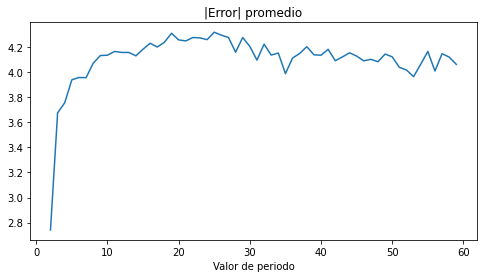

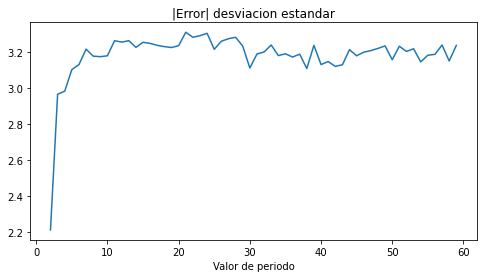

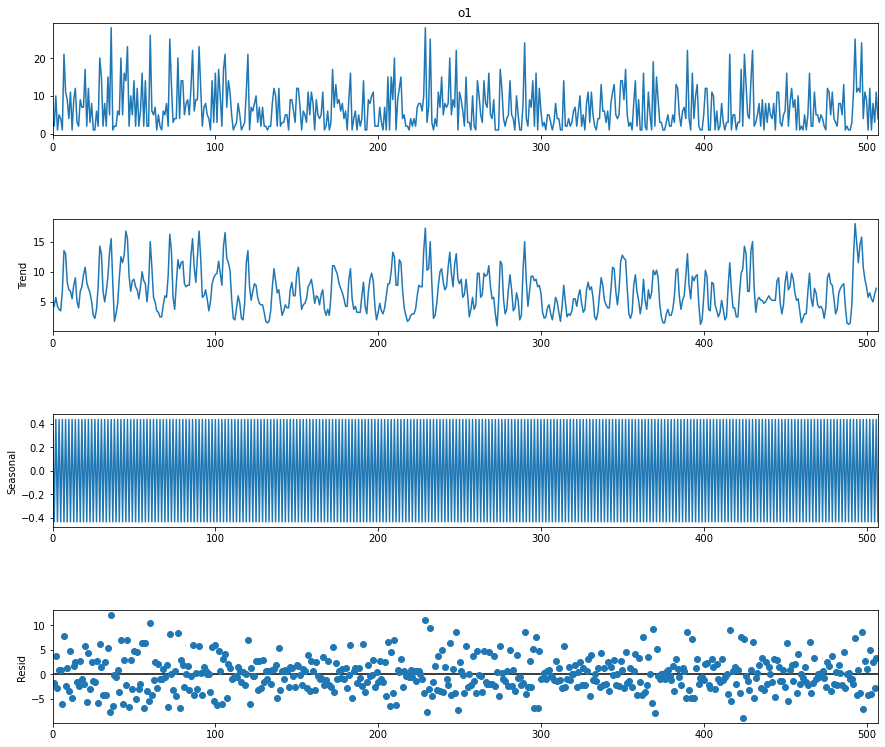

Valor promedio de |error|:  2.7418683310159504
Valor desv.est de |error|:  2.2105722102857985


In [12]:
# Separar señales en sus componentes segun series de tiempo segun modelo "aditivo" : R + T + S

import statsmodels.api as sm

muestra = tabla[["Sorteo","o1"]].copy()
muestra = muestra.set_index("Sorteo").reset_index()

# Iterar para buscar el mejor periodo segun el error cometido
mejor_periodo = None
mejor_error = 10000
prom_errores = []
desv_errores = []
periodos = [] 
for periodo in range(2,60,1):    
    # Aplicar descomposicion de serie de tiempo segun sus componentes : residuo - tendencia - estacional
    decomposition = sm.tsa.seasonal_decompose(muestra["o1"], model='additive',period=periodo)
    resid = decomposition.resid
    resid = resid[~resid.isna()]
    seasonal = decomposition.seasonal
    seasonal = seasonal[~seasonal.isna()]
    trend = decomposition.trend
    trend = trend[~trend.isna()]

    # calcular indicadores segun resid
    error = np.abs(resid)
    prom_error = np.round(np.nanmean(error),3)
    desv_error = np.round(np.nanstd(error),3)
    print('Periodo: ',periodo,' ; Valor promedio de |error|: ',prom_error,'Valor desv.est de |error|: ',desv_error)
    
    # guardar resultados
    prom_errores.append(prom_error)
    desv_errores.append(desv_error)
    periodos.append(periodo)
    
    # Guardar si se mejora el error promedio
    if(prom_error < mejor_error):
        mejor_error = prom_error
        mejor_periodo = periodo

# Mejores resultados
print('*********************************************************************')
print('Mejor periodo: ',mejor_periodo,' ; Mejor ||error||: ',mejor_error)
print('*********************************************************************\n')

plt.figure(figsize=(8,4))
plt.plot(periodos,prom_errores)
plt.title('|Error| promedio')
plt.xlabel('Valor de periodo')
plt.show()

plt.figure(figsize=(8,4))
plt.plot(periodos,desv_errores)
plt.title('|Error| desviacion estandar')
plt.xlabel('Valor de periodo')
plt.show()

# Aplicar descomposicion de serie de tiempo segun sus componentes : residuo - tendencia - estacional
decomposition = sm.tsa.seasonal_decompose(muestra["o1"], model='additive',period=mejor_periodo)
resid = decomposition.resid
resid = resid[~resid.isna()]
seasonal = decomposition.seasonal
seasonal = seasonal[~seasonal.isna()]
trend = decomposition.trend
trend = trend[~trend.isna()]
fig = decomposition.plot()
fig.set_size_inches(14,12)
plt.show()

# calcular indicadores segun resid
error = np.abs(resid)
print('Valor promedio de |error|: ',np.nanmean(error))
print('Valor desv.est de |error|: ',np.nanstd(error))    
    
# fin

Periodo:  2  ; Valor promedio de |error|:  0.933 Valor desv.est de |error|:  0.467
Periodo:  3  ; Valor promedio de |error|:  1.009 Valor desv.est de |error|:  0.635
Periodo:  4  ; Valor promedio de |error|:  0.98 Valor desv.est de |error|:  0.655
Periodo:  5  ; Valor promedio de |error|:  0.999 Valor desv.est de |error|:  0.715
Periodo:  6  ; Valor promedio de |error|:  0.986 Valor desv.est de |error|:  0.711
Periodo:  7  ; Valor promedio de |error|:  0.995 Valor desv.est de |error|:  0.729
Periodo:  8  ; Valor promedio de |error|:  0.993 Valor desv.est de |error|:  0.75
Periodo:  9  ; Valor promedio de |error|:  0.999 Valor desv.est de |error|:  0.761
Periodo:  10  ; Valor promedio de |error|:  0.995 Valor desv.est de |error|:  0.758
Periodo:  11  ; Valor promedio de |error|:  0.997 Valor desv.est de |error|:  0.766
Periodo:  12  ; Valor promedio de |error|:  0.994 Valor desv.est de |error|:  0.772
Periodo:  13  ; Valor promedio de |error|:  0.997 Valor desv.est de |error|:  0.781
Pe

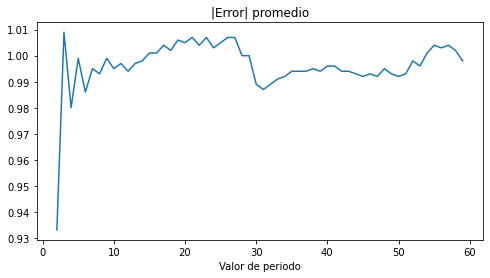

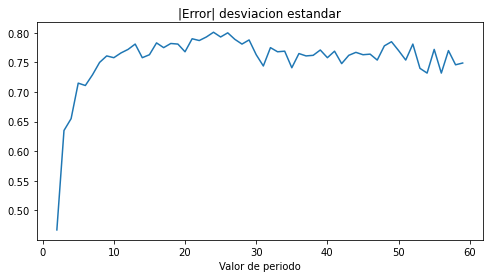

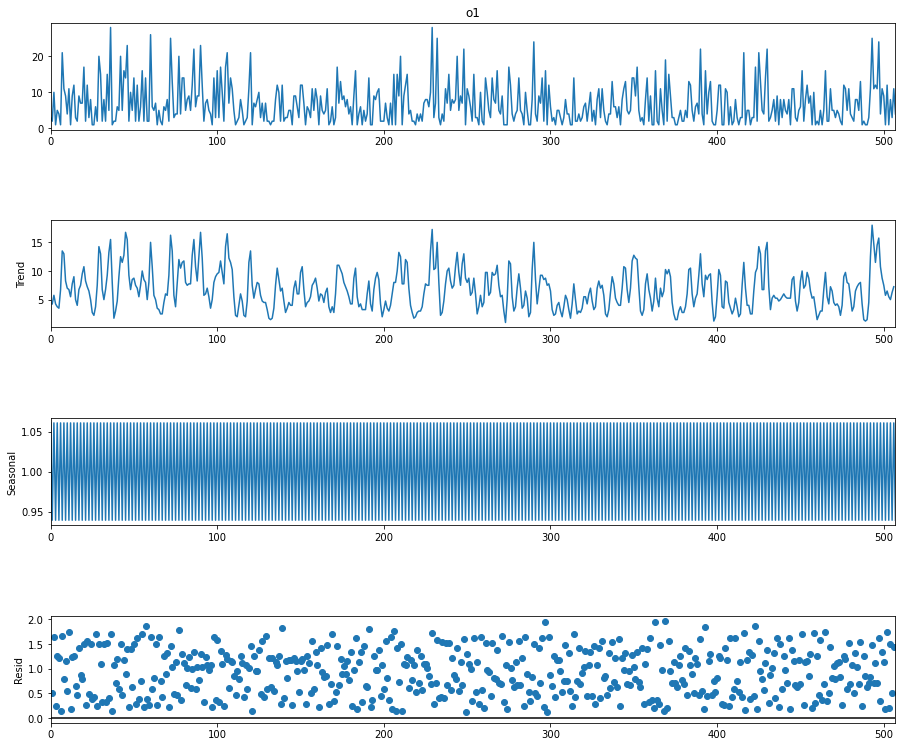

Valor promedio de |error|:  0.933025161249761
Valor desv.est de |error|:  0.466836110680777


In [13]:
# Separar señales en sus componentes segun series de tiempo segun modelo "multiplicativo" : R*T*S

import statsmodels.api as sm

muestra = tabla[["Sorteo","o1"]].copy()
muestra = muestra.set_index("Sorteo").reset_index()

# Iterar para buscar el mejor periodo segun el error cometido
mejor_periodo = None
mejor_error = 10000
prom_errores = []
desv_errores = []
periodos = [] 
for periodo in range(2,60,1):    
    # Aplicar descomposicion de serie de tiempo segun sus componentes : residuo - tendencia - estacional
    decomposition = sm.tsa.seasonal_decompose(muestra["o1"], model='multiplicative',period=periodo)
    resid = decomposition.resid
    resid = resid[~resid.isna()]
    seasonal = decomposition.seasonal
    seasonal = seasonal[~seasonal.isna()]
    trend = decomposition.trend
    trend = trend[~trend.isna()]

    # calcular indicadores segun resid
    error = np.abs(resid)
    prom_error = np.round(np.nanmean(error),3)
    desv_error = np.round(np.nanstd(error),3)
    print('Periodo: ',periodo,' ; Valor promedio de |error|: ',prom_error,'Valor desv.est de |error|: ',desv_error)
    
    # guardar resultados
    prom_errores.append(prom_error)
    desv_errores.append(desv_error)
    periodos.append(periodo)
    
    # Guardar si se mejora el error promedio
    if(prom_error < mejor_error):
        mejor_error = prom_error
        mejor_periodo = periodo

# Mejores resultados
print('*********************************************************************')
print('Mejor periodo: ',mejor_periodo,' ; Mejor ||error||: ',mejor_error)
print('*********************************************************************\n')

plt.figure(figsize=(8,4))
plt.plot(periodos,prom_errores)
plt.title('|Error| promedio')
plt.xlabel('Valor de periodo')
plt.show()

plt.figure(figsize=(8,4))
plt.plot(periodos,desv_errores)
plt.title('|Error| desviacion estandar')
plt.xlabel('Valor de periodo')
plt.show()

# Aplicar descomposicion de serie de tiempo segun sus componentes : residuo - tendencia - estacional
decomposition = sm.tsa.seasonal_decompose(muestra["o1"], model='multiplicative',period=mejor_periodo)
resid = decomposition.resid
resid = resid[~resid.isna()]
seasonal = decomposition.seasonal
seasonal = seasonal[~seasonal.isna()]
trend = decomposition.trend
trend = trend[~trend.isna()]
fig = decomposition.plot()
fig.set_size_inches(14,12)
plt.show()

# calcular indicadores segun resid
error = np.abs(resid)
print('Valor promedio de |error|: ',np.nanmean(error))
print('Valor desv.est de |error|: ',np.nanstd(error))    
    
# fin

Segun los resultados obtenidos, se comprueba que el mejor periodo determinado es de 2, lo cual nos lleva a pensar que los datos a lo mucho podrían ser explicados por los ultimos 2 resultados, más no depender de una tendencia o patron que dependa de muchos datos pasados.
<br><br>
Otra conclusión o observación, es que el modelo de separación multiplicativo (T*S*R) se ajusta mejor al aditivo (T + S + R), evidenciado en la dispersión del residuo (resid).

---------

Calcular las diferencias en los valores de las bolitas
<br><br>
Notas:
<br>
La primera diferencia de o1[n] es o1_1[n] = o1[n] - o1[n-1]
<br>
La segunda diferencia es o1[n] es o1_2[n] = o1_1[n] - o1_1[n-1]
<br>
Y asi ....

In [14]:
# Calculo de diferencias en los valores de los valores de "o1"

tabla_aux = tabla.loc[:,["Fecha","o1"]].copy()
tabla_aux["o1_1"] = tabla_aux["o1"].copy().shift(-1) - tabla_aux["o1"].copy()
tabla_aux["o1_2"] = tabla_aux["o1_1"].copy().shift(-1) - tabla_aux["o1_1"].copy()
tabla_aux["o1_3"] = tabla_aux["o1_2"].copy().shift(-1) - tabla_aux["o1_2"].copy()
tabla_aux["o1_4"] = tabla_aux["o1_3"].copy().shift(-1) - tabla_aux["o1_3"].copy()
tabla_aux["o1_5"] = tabla_aux["o1_4"].copy().shift(-1) - tabla_aux["o1_4"].copy()
tabla_aux["o1_6"] = tabla_aux["o1_5"].copy().shift(-1) - tabla_aux["o1_5"].copy()
tabla_aux["o1_7"] = tabla_aux["o1_6"].copy().shift(-1) - tabla_aux["o1_6"].copy()
tabla_aux["o1_8"] = tabla_aux["o1_7"].copy().shift(-1) - tabla_aux["o1_7"].copy()
tabla_aux["o1_9"] = tabla_aux["o1_8"].copy().shift(-1) - tabla_aux["o1_8"].copy()
tabla_aux["o1_10"] = tabla_aux["o1_9"].copy().shift(-1) - tabla_aux["o1_9"].copy()
tabla_aux = tabla_aux.dropna()
tabla_aux

Fecha  o1  o1_1  o1_2  o1_3   o1_4   o1_5   o1_6   o1_7    o1_8  \
0   2022-06-03   3  -1.0   9.0 -26.0   56.0 -104.0  173.0 -241.0   208.0   
1   2022-02-03   2   8.0 -17.0  30.0  -48.0   69.0  -68.0  -33.0   403.0   
2   2022-02-27  10  -9.0  13.0 -18.0   21.0    1.0 -101.0  370.0  -948.0   
3   2022-02-23   1   4.0  -5.0   3.0   22.0 -100.0  269.0 -578.0  1102.0   
4   2022-02-20   5  -1.0  -2.0  25.0  -78.0  169.0 -309.0  524.0  -884.0   
..         ...  ..   ...   ...   ...    ...    ...    ...    ...     ...   
493 2017-02-19  25 -14.0  15.0 -17.0   33.0  -96.0  266.0 -639.0  1350.0   
494 2017-02-15  11   1.0  -2.0  16.0  -63.0  170.0 -373.0  711.0 -1201.0   
495 2017-12-02  12  -1.0  14.0 -47.0  107.0 -203.0  338.0 -490.0   571.0   
496 2017-08-02  11  13.0 -33.0  60.0  -96.0  135.0 -152.0   81.0   225.0   
497 2017-05-02  24 -20.0  27.0 -36.0   39.0  -17.0  -71.0  306.0  -839.0   

       o1_9   o1_10  
0     195.0 -1546.0  
1   -1351.0  3401.0  
2    2050.0 -4036.0  
3   -1986.0  3553.0  
4    1567.0 -2981.0  
..      ...     ...  
493 -2551.0  4323.0  
494  1772.0 -2118.0  
495  -346.0  -718.0  
496 -1064.0  3010.0  
497  1946.0 -4136.0  

[498 rows x 12 columns]

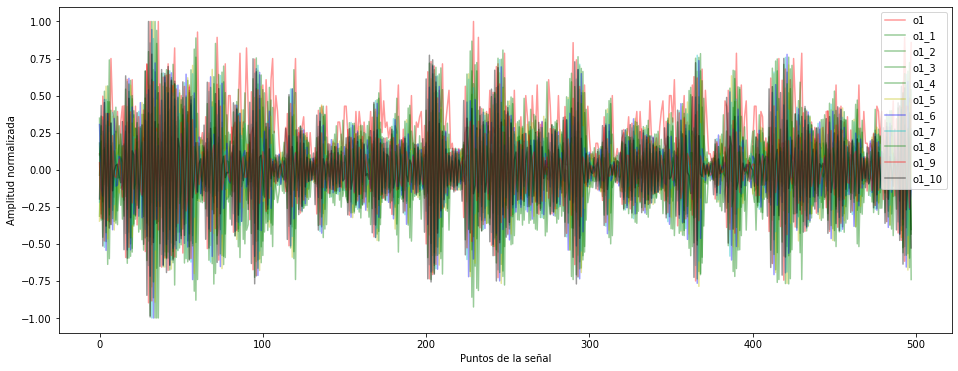

In [15]:
# graficar las secuencias en diferencias con normalizacion de amplitud

columnas = tabla_aux.loc[:,"o1":"o1_10"].columns.tolist()
colores = ['b','g','r','c','m','y','k']
plt.figure(figsize=(16,6))
for colu in columnas:
    # Graficar valores señales normalizadas
    ii = np.random.randint(0,len(colores))
    
    # obtener valor maximo de señal en valor absoluto
    maximo = np.nanmax(np.abs(tabla_aux[colu]))
    
    # grafica de señal
    sns.lineplot(x=range(tabla_aux.shape[0]),y=tabla_aux[colu]/maximo,color=colores[ii],alpha=0.4,label=colu)

# Titulo, ejes y leyenda
plt.legend(loc=1)
plt.xlabel('Puntos de la señal')
plt.ylabel('Amplitud normalizada')
plt.show()

# fin

In [42]:
# Escuchar el sonido de las muestras como si fuesen tratadas como señales de audio

# Importar librerias de audio
import sounddevice as sd
import time

# Frecuencia de muestreo de la señal de audio
fs = 1000

columnas = tabla_aux.loc[:,"o1":"o1_10"].columns.tolist()
for colu in columnas:
    # Normalización de la señal al rango [-1,1]
    maximo = np.nanmax(np.abs(tabla_aux[colu]))
    sonido = tabla_aux[colu]/maximo
    sd.play(sonido, fs) # reproducir el sonido
    time.sleep(2)
    print('fin de sonido: ',colu)

# fin

fin de sonido:  o1
fin de sonido:  o1_1
fin de sonido:  o1_2
fin de sonido:  o1_3
fin de sonido:  o1_4
fin de sonido:  o1_5
fin de sonido:  o1_6
fin de sonido:  o1_7
fin de sonido:  o1_8
fin de sonido:  o1_9
fin de sonido:  o1_10


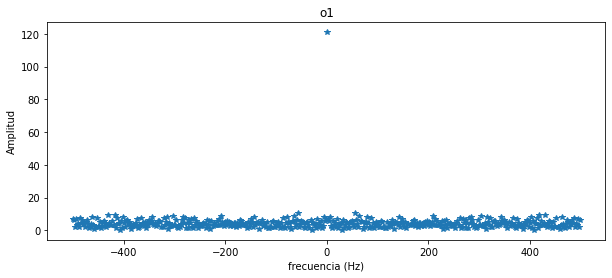

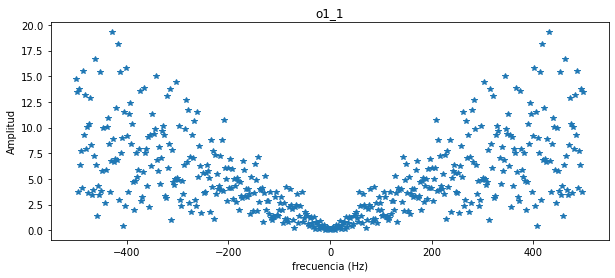

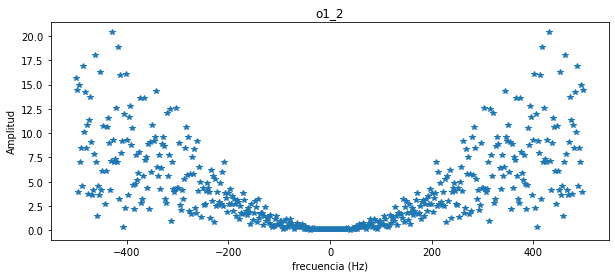

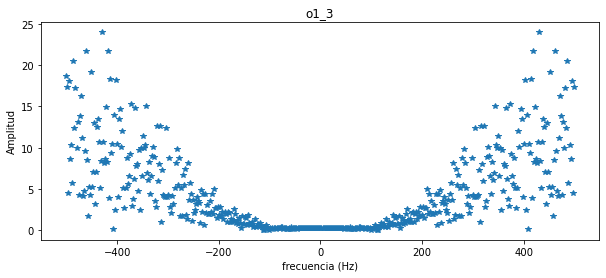

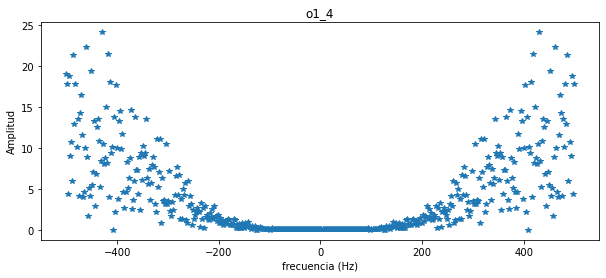

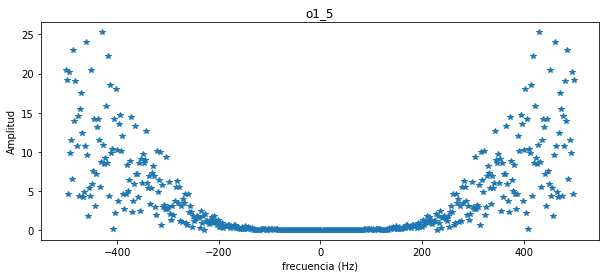

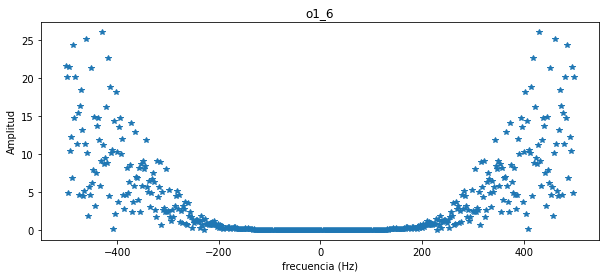

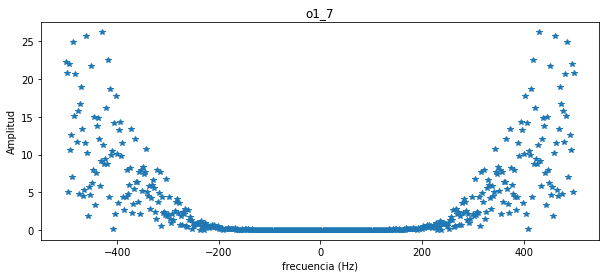

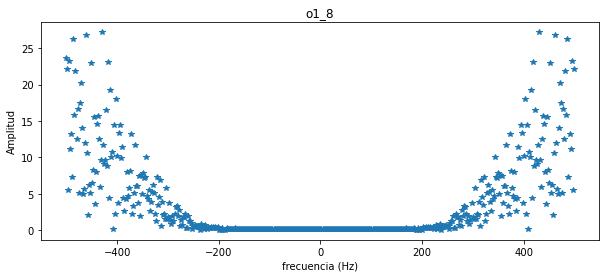

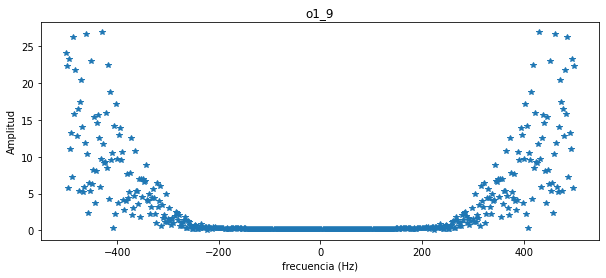

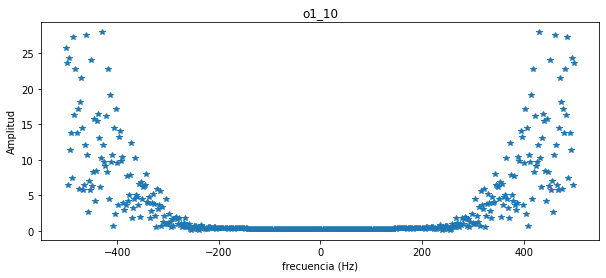

In [16]:
# Analisis en frecuencia de las señales en diferencias obtenidos

# importar librerias para transformada de Fourir
from scipy.fft import fft, fftfreq

# Frecuencia de muestreo de la señal de audio
fs = 1000
columnas = tabla_aux.loc[:,"o1":"o1_10"].columns.tolist()

# Calculo de Fourier y ploteo
for colu in columnas:
    plt.figure(figsize=(10,4))
    maximo = np.nanmax(np.abs(tabla_aux[colu]))
    sonido = np.array(tabla_aux[colu]/maximo)
    N = len(sonido)
    yf = fft(sonido)
    xf = fftfreq(N, 1/fs)
    plt.plot(xf, np.abs(yf),'*')
    plt.xlabel('frecuencia (Hz)')
    plt.ylabel('Amplitud')
    plt.title(colu)
    plt.show()

# fin

--------------
--------------
--------------